<a href="https://colab.research.google.com/github/Yashwanth-Krishna-18/PCA-From-Scratch/blob/main/Kernel_PCA_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kernel PCA Scratch code Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Lets take a DataSet

       d: no of features
       n:no of data points


In [ ]:
X=np.array([(1,1),(2,4),(-1,1),(-2,4)]).T
print(X)

[[ 1  2 -1 -2]
 [ 1  4  1  4]]


Graphical Representation of data Points in data Space for understanding Structural Relation of The Data
For This data d=4,n=2

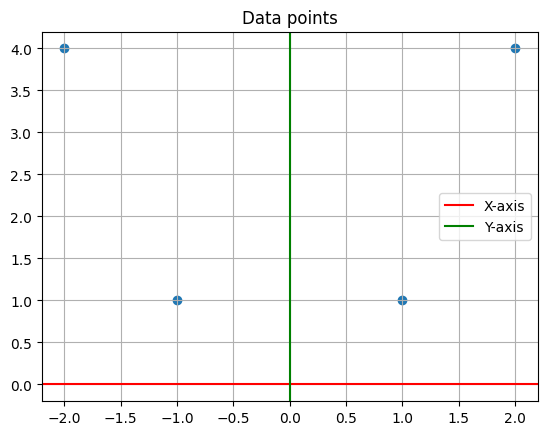

In [12]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(y=0,color="red",label="X-axis" )
plt.axvline(x=0,color="green",label='Y-axis')
plt.title("Data points")
plt.grid()
plt.legend()
plt.show()

Calculation of Kernel Function from data Set We opt Polynomial Kernel of Degree 2
K(X1,X2)=(X1.X2+1)**2 It is Symmetric positive Semidefinite

In [15]:
def pol_kernel(A,B,k):
  ans=(A.T@B+1)**2
  return ans
ker=pol_kernel(X,X,2)
print(ker)

[[  9  49   1   9]
 [ 49 441   9 169]
 [  1   9   9  49]
 [  9 169  49 441]]


Centre The dataSet The Kernel opted for The Dataset the Formula to Centre The Kernel KC=K-Ik-KI+IKI
where I is a Matrix filled by 1/n with shape (n,n)

In [17]:
def centre_dataset(k):
  n=k.shape[0]
  arrs=np.ones((n,n),dtype=int)
  I=arrs/n
  KC=k-I@k-k@I+I@k@I
  return KC
kc=centre_dataset(ker)
print(kc)

[[ 67. -43.  59. -83.]
 [-43. 199. -83. -73.]
 [ 59. -83.  67. -43.]
 [-83. -73. -43. 199.]]


Computation of Eigen Values and Eigen Vectors where Eigen Vectors are {beta1 ,beta2,...betan} and Eigen Values are {nlamba1,nlambda2,.....nlamban}

In [31]:
eigen_values,eigen_vectors=np.linalg.eig(kc)
idx=eigen_values.argsort()[::-1]
eigen_values=eigen_values[idx]
eigen_vectors=eigen_vectors[:,idx]
print(eigen_values)
print(eigen_vectors)



[ 2.77927517e+02  2.52000000e+02  2.07248280e+00 -3.22463841e-15]
[[-0.10365278 -0.5         0.69946844  0.5       ]
 [-0.69946844  0.5        -0.10365278  0.5       ]
 [ 0.10365278 -0.5        -0.69946844  0.5       ]
 [ 0.69946844  0.5         0.10365278  0.5       ]]


Calculating The alpha That dataset Posses

In [40]:
alpha=eigen_vectors/np.sqrt(eigen_values)
actual_projection=kc@alpha
print(actual_projection)

[[ -1.72801191  -7.93725393   1.00696319          nan]
 [-11.66094908   7.93725393  -0.14921979          nan]
 [  1.72801191  -7.93725393  -1.00696319          nan]
 [ 11.66094908   7.93725393   0.14921979          nan]]


<ipython-input-40-99c5acca894a>:1: RuntimeWarning: invalid value encountered in sqrt
  alpha=eigen_vectors/np.sqrt(eigen_values)
